# Project: 30_days_of_ML_Competition

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ready">Prepare Data For ML</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### importing libraries that will be used to investigate Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set_style("whitegrid")
import lightgbm as lgb
from sklearn.model_selection import RepeatedKFold
import optuna
pd.options.display.max_colwidth = 250
pd.options.display.max_columns = 50

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [8]:
# loading CSV files in to 3 Dataframes  //df, df_test and sub//

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [9]:
y = df.target

### Assessing Data

In [10]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [11]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [12]:
#checking Dataframe shape (number of rows and columns)
df.shape, df_test.shape

((300000, 26), (200000, 25))

In [13]:
#checking more information and descriptive statistics

df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [14]:
df.describe(include="O")

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249


In [15]:
df_test.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249970.884580,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
max,499995.000000,1.058434,0.887253,1.034687,1.039558,1.055423,1.067641,1.111540,1.032823,1.040208,0.982928,1.055955,1.071445,0.975032,0.906013


In [16]:
df_test.describe(include="O")

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,128830,103174,169377,175480,196535,100175,193519,183796,74310,46984


In [17]:
# checking for NaN values patients

df.isnull().sum().sum(),df_test.isnull().sum().sum() 

(0, 0)

In [18]:
#checking for duplicated rows 

df.duplicated().sum()

0

<a id='clean'></a>

## Data Cleaning

In [19]:
# split columns into oridinal,onehot and quantitative 

count = [i for i in df.columns if 'cont' in i]
oridinal = [i for i in df.columns if df[i].nunique()<=5]
onehot = [i for i in df.columns if np.logical_and(df[i].nunique()>5,'cat' in i)]
cat = oridinal + onehot

# count + target
co = count.copy()
co.append("target")

### Remove outloiers

In [20]:
mean = df.target.mean()
std =  df.target.std()
cut_off = std*3
lower, upper = mean -cut_off , mean +cut_off
outliers = df[(df.target <lower)|(df.target >upper)]
df = df.drop(outliers.index)

### Change categorical variables data type to category to decrease memory usage

In [21]:
for i in cat:
    df[i] = df[i].astype("category")
    df_test[i] = df_test[i].astype("category")

In [22]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299627 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      299627 non-null  int64   
 1   cat0    299627 non-null  category
 2   cat1    299627 non-null  category
 3   cat2    299627 non-null  category
 4   cat3    299627 non-null  category
 5   cat4    299627 non-null  category
 6   cat5    299627 non-null  category
 7   cat6    299627 non-null  category
 8   cat7    299627 non-null  category
 9   cat8    299627 non-null  category
 10  cat9    299627 non-null  category
 11  cont0   299627 non-null  float64 
 12  cont1   299627 non-null  float64 
 13  cont2   299627 non-null  float64 
 14  cont3   299627 non-null  float64 
 15  cont4   299627 non-null  float64 
 16  cont5   299627 non-null  float64 
 17  cont6   299627 non-null  float64 
 18  cont7   299627 non-null  float64 
 19  cont8   299627 non-null  float64 
 20  cont9   299627 non-null  f

In [23]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      200000 non-null  int64   
 1   cat0    200000 non-null  category
 2   cat1    200000 non-null  category
 3   cat2    200000 non-null  category
 4   cat3    200000 non-null  category
 5   cat4    200000 non-null  category
 6   cat5    200000 non-null  category
 7   cat6    200000 non-null  category
 8   cat7    200000 non-null  category
 9   cat8    200000 non-null  category
 10  cat9    200000 non-null  category
 11  cont0   200000 non-null  float64 
 12  cont1   200000 non-null  float64 
 13  cont2   200000 non-null  float64 
 14  cont3   200000 non-null  float64 
 15  cont4   200000 non-null  float64 
 16  cont5   200000 non-null  float64 
 17  cont6   200000 non-null  float64 
 18  cont7   200000 non-null  float64 
 19  cont8   200000 non-null  float64 
 20  cont9   200000 non-null  f

<a id='ready'></a>

#  Preparing Data for ML model

### Encode categorical variables

In [24]:
# check if catgories unique values in both train and test datasets are same

for i in onehot:
    if sorted(list(df[i].value_counts().index)) != sorted(list(df_test[i].value_counts().index)):
        print(i)
    else:
        print("No issue")

No issue
No issue
No issue
No issue


In [25]:
# use onehot encoding on categorical variables

X_dummies = pd.get_dummies(df[onehot])
test_dummies = pd.get_dummies(df_test[onehot])


ordinal_encoder = OrdinalEncoder()
X_oridinal = df[oridinal].copy()
test_oridinal = df_test[oridinal].copy()

X_oridinal[oridinal] = pd.DataFrame(ordinal_encoder.fit_transform(X_oridinal[oridinal]))
test_oridinal[oridinal] = pd.DataFrame(ordinal_encoder.fit_transform(test_oridinal[oridinal]))

X = pd.concat([df[count],X_dummies, X_oridinal], axis=1)
test =  pd.concat([df_test[count],test_dummies, test_oridinal], axis=1)
y = df.target
sorted(list(X.columns)) == sorted(list(test.columns))

True

In [26]:
X.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat6_A,cat6_B,cat6_C,cat6_D,cat6_E,cat6_G,cat6_H,cat6_I,cat7_A,cat7_B,cat7_C,...,cat8_D,cat8_E,cat8_F,cat8_G,cat9_A,cat9_B,cat9_C,cat9_D,cat9_E,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O,cat0,cat1,cat2,cat3,cat4,cat5
0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,2.0,1.0,1.0
1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,1.0,3.0
2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,1.0,3.0
3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1.0,0.0,2.0,1.0,3.0
4,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,2.0,1.0,3.0


### Now we have 3 dataframes (X, y and test)

## Hyperparameters Tuning using Hyperopt

**First of all let's import some useful functions from the hyperopt:**

* fmin - the main function for us, it will minimize our functional
* tpe and anneal - optimization approaches
* hp - include different distributions of variables
* Trials - is used for logging

### Lightlgb

In [29]:
from hyperopt import fmin, tpe, hp, anneal, Trials


def objective(params):
#    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=random_state)
    #dtrain = lgb.Dataset(train_x, label=train_y)
    #dvalid = lgb.Dataset(valid_x, label=valid_y)
    
    
    params = {
        'num_leaves': int(params['num_leaves']),
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': float(params['learning_rate']),
    }
    
    modell = lgb.LGBMRegressor(**params,random_state=random_state)
    modell.fit(train_X, train_y)
    preds = modell.predict(test_X)    
    
    score = mean_squared_error(preds, test_y, squared=False)
    print("Score {:.3f} params {}".format(score, params))
    return score

In [30]:
%%time
##
import warnings
warnings.filterwarnings("ignore")

space = {
    'objective': 'regression',
    'metric':'rmse',
    'boosting':'gbdt',
    'n_estimators': hp.randint('n_estimators', 25, 5000),
    'max_depth':  hp.choice('max_depth', [5, 8, 10, 12, 15]),
    'num_leaves': hp.choice('num_leaves', [100, 250, 500, 650, 750, 1000,1300]),
    'learning_rate': hp.uniform('learning_rate', .001, 0.99),
 }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

Score 0.760 params {'num_leaves': 500, 'n_estimators': 4700, 'max_depth': 8, 'learning_rate': 0.15550917780552545}
Score 0.755 params {'num_leaves': 100, 'n_estimators': 2771, 'max_depth': 5, 'learning_rate': 0.29373719564941053}
Score 0.719 params {'num_leaves': 750, 'n_estimators': 263, 'max_depth': 10, 'learning_rate': 0.06088779531532962}
Score 0.859 params {'num_leaves': 750, 'n_estimators': 4114, 'max_depth': 15, 'learning_rate': 0.6191970108938278}
Score 0.720 params {'num_leaves': 250, 'n_estimators': 2253, 'max_depth': 8, 'learning_rate': 0.03186907999052472}
Score 0.880 params {'num_leaves': 500, 'n_estimators': 4526, 'max_depth': 5, 'learning_rate': 0.7893967165261353}
Score 0.716 params {'num_leaves': 250, 'n_estimators': 130, 'max_depth': 5, 'learning_rate': 0.12260176613558221}
Score 0.908 params {'num_leaves': 1000, 'n_estimators': 890, 'max_depth': 15, 'learning_rate': 0.7687455868407316}
Score 0.903 params {'num_leaves': 100, 'n_estimators': 2790, 'max_depth': 10, 'lea

In [33]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'learning_rate': 0.12260176613558221, 'max_depth': 0, 'n_estimators': 130, 'num_leaves': 1}


### bulding model

In [36]:
rmse_train = []
rmse_test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = lgb.LGBMRegressor(random_state=random_state,
                         **best
                       )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train = np.array(rmse_train)
rmse_test = np.array(rmse_test)
print("mean rmse is: {}".format(rmse_test.mean()))

mean rmse is: 0.7145861318320823


### Check overfitting and underfitting

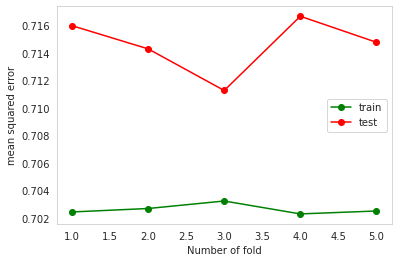

In [37]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train, 'o-', color='green', label='train')
plt.plot(folds, rmse_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

### Final Model

In [38]:
%%time

final_model = lgb.LGBMRegressor(random_state=1,
                         **best,
                        n_jobs=-1
                       )
final_model.fit(X, y)
final_preds = final_model.predict(test)

CPU times: user 14.9 s, sys: 82 ms, total: 15 s
Wall time: 4.12 s


### Save prediction to submission file

In [39]:
# Save test predictions to file

output = pd.DataFrame({'Id': test.index,
                       'SalePrice': final_preds})
output.to_csv('sub.csv', index=False)